<a href="https://colab.research.google.com/github/chebil/stat/blob/main/part1/ch01_plotting.ipynb" target="_blank" rel="noopener noreferrer"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting Data

The simplest way to present a dataset is with a table, but tables become unwieldy for large datasets. **Visualization** is key to understanding data - plots reveal patterns, outliers, and structure that tables obscure.

This section introduces fundamental plotting techniques for one-dimensional (1D) data:
- **Bar charts** for categorical data
- **Histograms** for continuous data
- **Conditional histograms** for comparing groups

## 1. Bar Charts

A **bar chart** displays categorical data with bars whose heights represent the frequency of each category.

### Definition

For categorical data with $k$ categories, a bar chart consists of:
- $k$ bars, one per category
- Height of each bar = count (or proportion) of items in that category
- Bars are typically separated by gaps

### When to Use Bar Charts

Bar charts are ideal for:
- **Categorical variables** (gender, goals, preferences)
- **Small number of categories** (typically < 20)
- **Comparing frequencies** across categories
- **Non-ordinal data** (though can be used for ordinal too)

### Example 1: Gender Distribution

The Chase and Danner study recorded gender for 478 students:
- **Boys**: 240 students (50.2%)
- **Girls**: 238 students (49.8%)

Popular Kids Dataset from https://lib.stat.cmu.edu/DASL/Datafiles/PopularKids.html

The bar chart immediately shows roughly equal gender distribution:

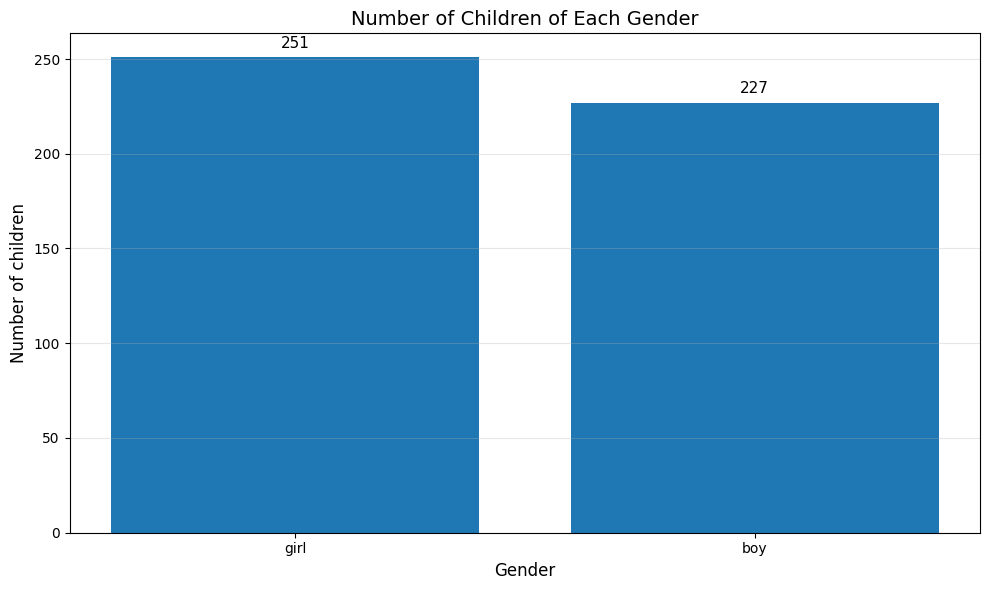

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
# Load the complete dataset from CSV
df = pd.read_csv('https://raw.githubusercontent.com/chebil/stat/main/part1/popular_kids_complete.csv')
# Count number
genders = df['Gender'].value_counts().index.tolist()
counts = df['Gender'].value_counts().tolist()

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(genders, counts)
plt.ylabel('Number of children', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.title('Number of Children of Each Gender', fontsize=14)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (gender, count) in enumerate(zip(genders, counts)):
    plt.text(i, count + 5, str(count), ha='center', fontsize=11)

plt.tight_layout()
plt.show()

### Example 2: Goals Distribution

The Chase and Danner study asked students what was most important to them: making good grades, being popular, or being good at sports. This categorical data shows what children value:

Goals Distribution:
Goals
Grades     247
Popular    141
Sports      90
Name: count, dtype: int64

Total students in sample: 478


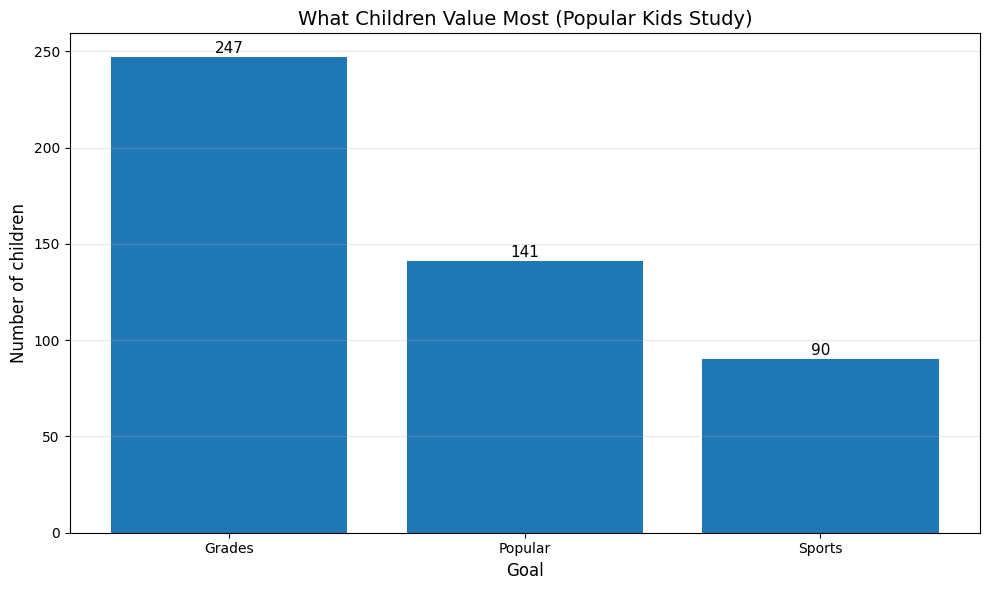

In [3]:
# For now, let's use the sample data and create visualizations
goals_counts = df['Goals'].value_counts()
print("Goals Distribution:")
print(goals_counts)
print(f"\nTotal students in sample: {len(df)}")

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(goals_counts.index, goals_counts.values)
plt.ylabel('Number of children', fontsize=12)
plt.xlabel('Goal', fontsize=12)
plt.title('What Children Value Most (Popular Kids Study)', fontsize=14)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()


## 2. Histograms

A **histogram** visualizes the distribution of a continuous variable by dividing the data into intervals (bins) and counting how many data points fall into each bin.

To understand histograms better, we will use the dataset from https://lib.stat.cmu.edu/DASL/Datafiles/Cheese.html which contains information about various types of cheese, including their fat content, moisture levels, and other characteristics.

### Dataset Description

As cheese ages, various chemical processes take place that determine the taste of the final product. This dataset contains concentrations of various chemicals in 30 samples of mature cheddar cheese, and a subjective measure of taste for each sample. The variables "Acetic" and "H2S" are the natural logarithm of the concentration of acetic asid and hydrogen sulfide respectively. The variable "Lactic" has not been transformed.
Number of cases: 30

To show Histogram of cheese goodness score for 30 cheeses we split into 6bins as follows:

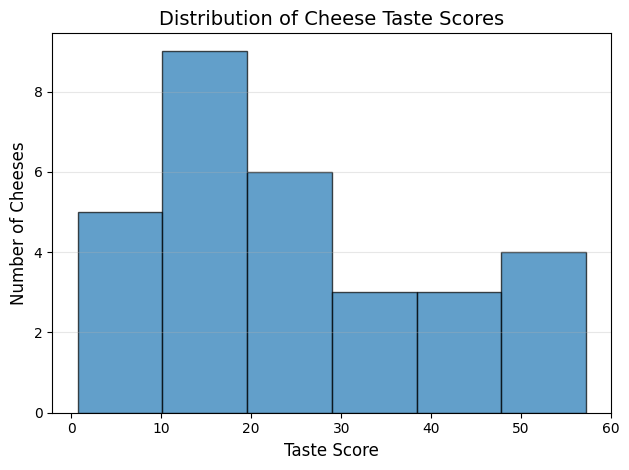

In [4]:
# Read the cheese dataset
cheese_df = pd.read_csv('https://raw.githubusercontent.com/chebil/stat/main/part1/Cheese.csv')
# Create histogram for cheese goodness taste score
plt.hist(cheese_df['taste'], bins=6, edgecolor='black', alpha=0.7)
plt.xlabel('Taste Score', fontsize=12)
plt.ylabel('Number of Cheeses', fontsize=12)
plt.title('Distribution of Cheese Taste Scores', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

We can manually set the number of bins according to the maximum value in the 'taste' column. we set the width of each bin to 10 to cover the range of taste scores from 20 to maximum taste score.

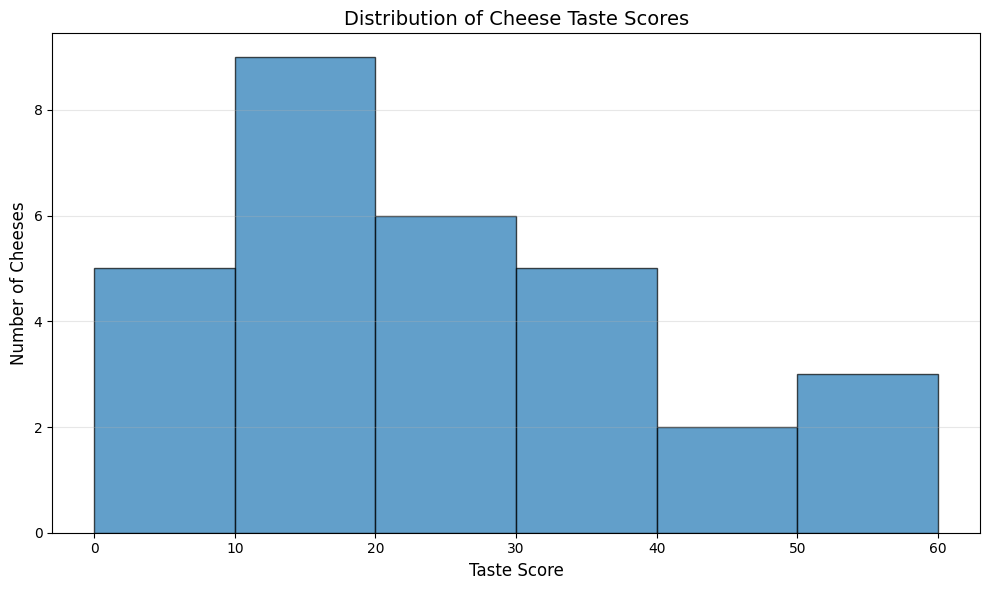

In [4]:
# Read the cheese dataset
cheese_df = pd.read_csv('Cheese.csv')
# Create histogram for cheese goodness taste score
plt.figure(figsize=(10, 6))
max_bin = int((cheese_df['taste'].max() // 10 + 1) * 10)
plt.hist(cheese_df['taste'], bins=range(0, max_bin + 10, 10), edgecolor='black', alpha=0.7)
plt.xlabel('Taste Score', fontsize=12)
plt.ylabel('Number of Cheeses', fontsize=12)
plt.title('Distribution of Cheese Taste Scores', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### We can make uneven bins as follows:

Custom bin edges: [0, 10, 20, 35, 50, 70]
Counts: [5 9 8 5 3]
Bin widths: [10 10 15 15 20]
Densities (height): [0.5        0.9        0.53333333 0.33333333 0.15      ]


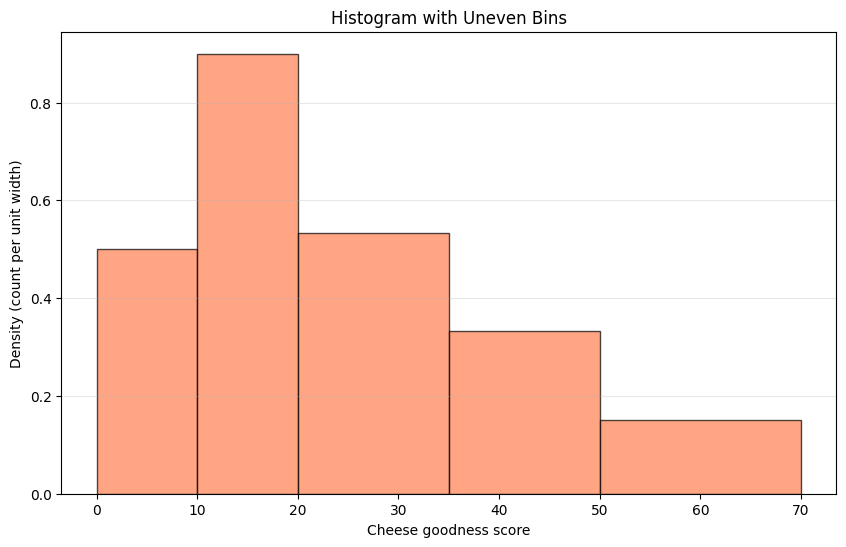

In [5]:
import numpy as np
# Custom bin edges (uneven)
custom_bins = [0, 10, 20, 35, 50, 70]
counts_custom, bin_edges = np.histogram(cheese_df['taste'], bins=custom_bins)

# Calculate widths and densities
bin_widths = np.diff(bin_edges)
densities = counts_custom / bin_widths  # Height proportional to density

print(f"Custom bin edges: {custom_bins}")
print(f"Counts: {counts_custom}")
print(f"Bin widths: {bin_widths}")
print(f"Densities (height): {densities}")

plt.figure(figsize=(10, 6))
plt.bar(bin_edges[:-1], densities, width=bin_widths, 
        align='edge', edgecolor='black', alpha=0.7, color='coral')
plt.xlabel('Cheese goodness score')
plt.ylabel('Density (count per unit width)')
plt.title('Histogram with Uneven Bins')
plt.grid(axis='y', alpha=0.3)
plt.show()

## Extra Example: Simulated body temperature data

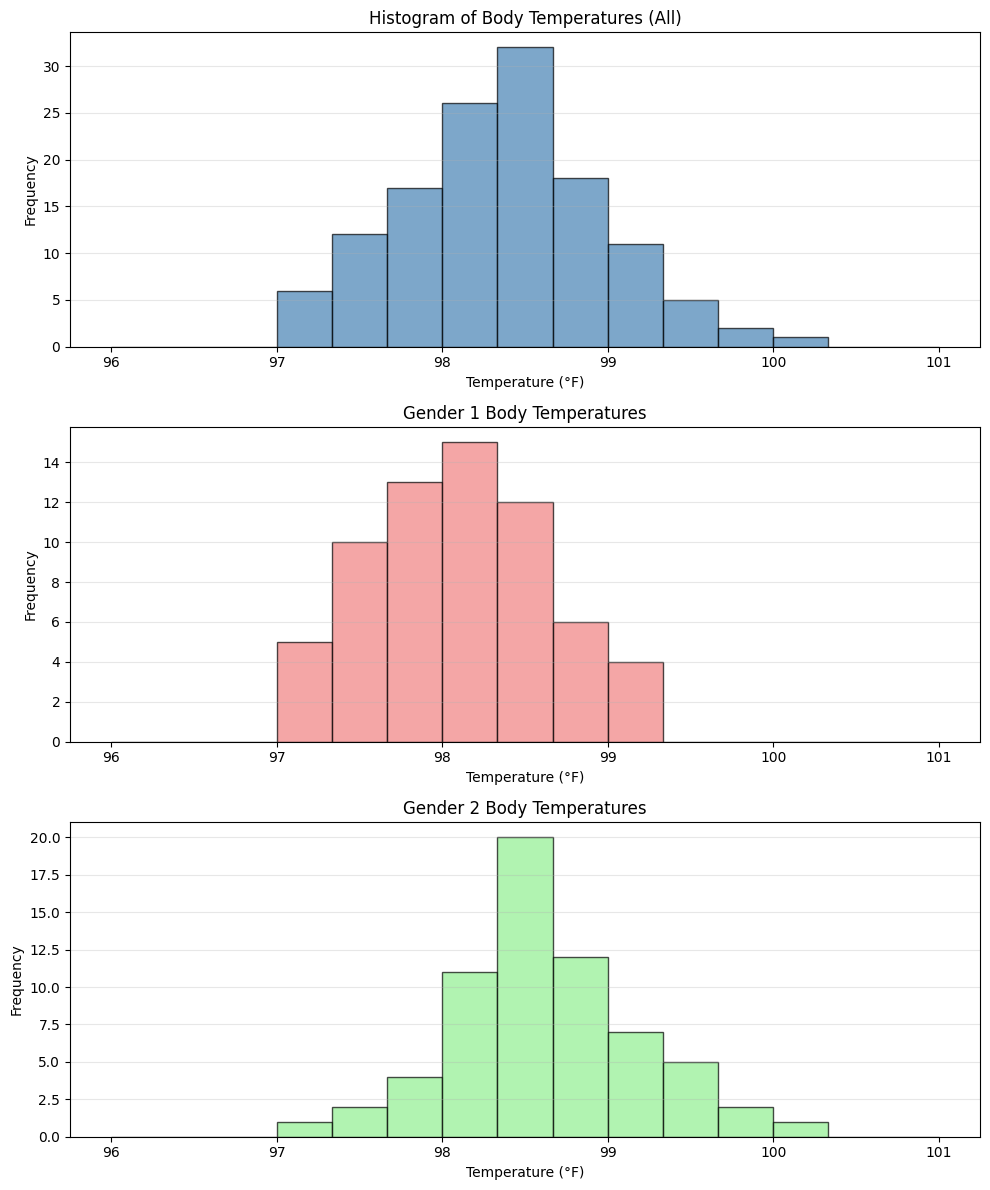

In [8]:
# Simulated body temperature data
np.random.seed(42)
temp_gender1 = np.random.normal(98.2, 0.6, 65)  # Gender 1
temp_gender2 = np.random.normal(98.6, 0.6, 65)  # Gender 2
all_temp = np.concatenate([temp_gender1, temp_gender2])

# Create figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# Overall histogram
axes[0].hist(all_temp, bins=15, range=(96, 101), 
             color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Temperature (°F)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Body Temperatures (All)')
axes[0].grid(axis='y', alpha=0.3)

# Gender 1 histogram
axes[1].hist(temp_gender1, bins=15, range=(96, 101), 
             color='lightcoral', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Temperature (°F)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Gender 1 Body Temperatures')
axes[1].grid(axis='y', alpha=0.3)

# Gender 2 histogram
axes[2].hist(temp_gender2, bins=15, range=(96, 101), 
             color='lightgreen', alpha=0.7, edgecolor='black')
axes[2].set_xlabel('Temperature (°F)')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Gender 2 Body Temperatures')
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

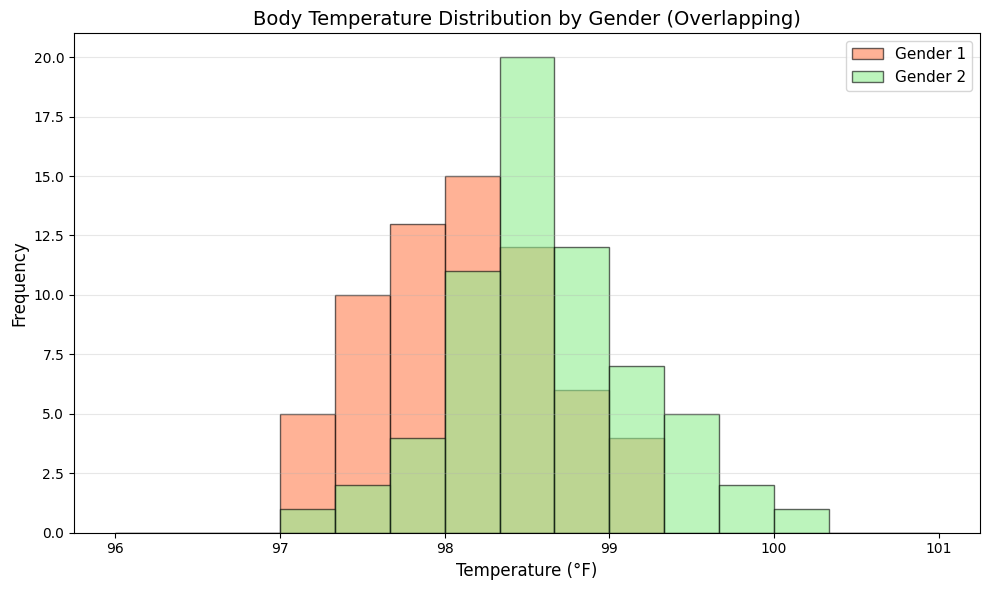

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(temp_gender1, bins=15, range=(96, 101), 
         alpha=0.6, label='Gender 1', color='coral', edgecolor='black')
plt.hist(temp_gender2, bins=15, range=(96, 101), 
         alpha=0.6, label='Gender 2', color='lightgreen', edgecolor='black')
plt.xlabel('Temperature (°F)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Body Temperature Distribution by Gender (Overlapping)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()